In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


def accuracy(Y,P):
    return np.count_nonzero(np.equal(np.argmax(Y,axis=-1),np.argmax(P,axis=-1)).astype(int))/float(Y.shape[0])

def visualize(data):
    p = data.reshape((28,28))
    plt.imshow(p,interpolation='none', cmap='gray_r')
    plt.show()

%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))/255.
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))/255.

11493376/11490434 [==============================] - 5s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(y_train[0:10])
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
[5 0 4 1 9 2 1 3 1 4]
(10000, 784)
(10000,)


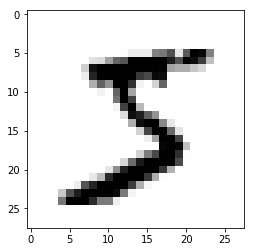

In [4]:
visualize(x_train[0])

In [11]:
#GRADED function
#Don't change the function name, parameters and return values
def one_hot(y):
    """
        Transforms labels to one-hot encoded labels.
        Input: 
            * y:   (M,)
        Output:
            * y_oh: (M, K)
    """
    y_oh = None
    ###Start code here
    
    M = len(y)
    K = 10
    y_oh = np.zeros((M,K))
    for i in range(M):
        y_oh[i,y[i]] = 1
    
    ###End code here
    return y_oh

In [12]:
one_hot(y_train)[0:10]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

In [13]:
y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)

print(y_train_oh.shape)
print(y_test_oh.shape)

(60000, 10)
(10000, 10)


In [209]:
#GRADED function
#Don't change the function name, parameters and return values
def initialize_weights(layer_dimensions):
    """
        Initialize the weights of the neural network.
        Input:
            * layer_dimensions: list containing the number of neurons for each layer. 
                                layer_dimensions[0] is the dimensionality of our data. 
                                layer_dimensions[1] is the number of neurons in the first layer.
        Output:
            * parameters: dict containing the weights of the network.
                          parameters["W1"] = the W weight matrix of the first layer
                          parameters["b1"] = the b bias node of the first layer
    """
    parameters={}
    ###Start code here
    
    for i in range (len(layer_dimensions)-1):
        weight_name = "W" + str(i+1)
        bias_name = "b" + str(i+1)
        
        parameters[weight_name] = np.random.randn(layer_dimensions[i+1],layer_dimensions[i])*0.01
        parameters[bias_name] = np.zeros((layer_dimensions[i+1],1))

    ###End code here
    return parameters

In [210]:
np.random.seed(0)
parameters = initialize_weights([3,6])
print("W1.shape=",parameters["W1"].shape)
print("b1.shape=",parameters["b1"].shape)
print("W1=",parameters["W1"])
print("b1=",parameters["b1"])

W1.shape= (6, 3)
b1.shape= (6, 1)
W1= [[ 0.01764052  0.00400157  0.00978738]
 [ 0.02240893  0.01867558 -0.00977278]
 [ 0.00950088 -0.00151357 -0.00103219]
 [ 0.00410599  0.00144044  0.01454274]
 [ 0.00761038  0.00121675  0.00443863]
 [ 0.00333674  0.01494079 -0.00205158]]
b1= [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [211]:
#GRADED function
#Don't change the function name, parameters and return values
def linear_forward(W, b, a_prev):
    """
        Linear unit in the computational graph.
        Inputs:
                * W: the weight matrix of the unit (dimensions in the graph above)
                * b: the bias vector of the unit (dimensions in the graph above)
                * a_prev: the activation from the previous node (dimensions in the graph above)
        Outputs:
                * Z:     the result (dimensions in the graph above)
                * cache: combination of values you will need in backward passes
    """
    ###Start code here
    
    # Calculate Z

    Z = np.zeros((len(W),len(a_prev[0])))
    
    for i in range(len(a_prev[0])):
        Z[:,i] = np.dot(W,a_prev[:,i]) + b.T

    # Create a cache for backpropagation
    cache = None
    
    ###End code here
    return Z, cache

In [212]:
np.random.seed(0)
parameters = initialize_weights([3,2])
x = np.random.randn(1,3).T
Z, cache = linear_forward(parameters["W1"],parameters["b1"],x)
print(Z)

[[ 0.01514415]
 [ 0.01947252]]


In [213]:
#GRADED function
#Don't change the function name, parameters and return values
def activation_forward(Z):
    """
        Activation node on the forward computational graph.
        Inputs:
                Z: the ouput of linear unit
        Outputs:
                a: the activation
    """
    ###Start code here
   
    #implement sigmoid activation
    a = 1./(1+np.exp(-1*Z))

    ###End code here
    return a

In [214]:
np.random.seed(0)
Z = np.random.randn(2,3)
activation_forward(Z)

array([[ 0.85371646,  0.59872543,  0.72685773],
       [ 0.9038621 ,  0.86617546,  0.27343225]])

In [215]:
#GRADED function
#Don't change the function name, parameters and return values
def softmax(Z):
    """
        Calculates the softmax of a matrix.
        Input: 
            * Z: (M,K)=(num_examples, num_categories)
        Returns:
            * a: (M,K)=(num_examples, num_categories)
    """
    ###Start code here
    
    # Transform Z to probabilites
    # The sum should be on categories!

    a = np.divide(np.exp(Z).T,np.sum(np.exp(Z).T,0)).T
    
    ###End code here
    return a

In [216]:
np.random.seed(0)
Z = np.random.randn(2,3)
softmax(Z)

array([[ 0.58423523,  0.14936733,  0.26639744],
       [ 0.57854881,  0.39829292,  0.02315827]])

In [256]:
#GRADED function
#Don't change the function name, parameters and return values
def nn_forward(parameters, X):
    """
        Calculates a forward step in the network.
        Input:
            * parameters: dict of parameters.
                          parameters["W1"]= the W matrix of first layer
                          parameters["b4"]=the bias vector in layer 4
            * X: input matrix. Shape (M,K)
    """
    caches = []
    L = len(parameters)//2
    
    ###Start code here
    
    # Set a_prev to the input!
    # In the first node of the computational graph, the input is transposed!
    a = X.T
    
    # Go trough the nodes of the computational graph, from LEFT to RIGHT
    # Always use as the input of current node the ouput of previous node!
    # Get the W, b weights from the parameters dictionary
    # use linear_forward and activation_forward function to step one in the layer
    # append the linear unit's cache to caches list
    
    # Important: the last layer activation should be softmax! 
    # Important: Transpose Z (in the last unit)
        
    for i in range(L):
        weight_name = "W" + str(i+1)
        bias_name = "b" + str(i+1)
        
        a,new_cache = linear_forward(parameters[weight_name],parameters[bias_name],a)
        caches.append(new_cache)
        a = activation_forward(a)
    
    a = softmax(a.T)

    ###End code here
    
    return (a,caches)

In [257]:
np.random.seed(1)
parameters = initialize_weights([3,4,2])
x = np.random.randn(2,3)
AL, cache = nn_forward(parameters, x)
print(AL)

[[ 0.49991897  0.50008103]
 [ 0.49991708  0.50008292]]


In [240]:
current_layer = x.T
np.random.seed(1)

In [246]:
i = 0
weight_name = "W" + str(i+1)
bias_name = "b" + str(i+1)

In [247]:
a1 = activation_forward(linear_forward(parameters[weight_name],parameters[bias_name],x.T)[0])

In [249]:
i = 1
weight_name = "W" + str(i+1)
bias_name = "b" + str(i+1)

a2 = activation_forward(linear_forward(parameters[weight_name],parameters[bias_name],a1)[0])

In [259]:
a2

array([[ 0.49914663,  0.49913558],
       [ 0.49947076,  0.49946726]])

In [252]:
softmax(a2.T)

array([[ 0.49991897,  0.50008103],
       [ 0.49991708,  0.50008292]])

In [253]:
softmax(a2)

array([[ 0.50000276,  0.49999724],
       [ 0.50000087,  0.49999913]])